# Introduction

What is Mental Health?

Mental health, refers to the emotional, psychological state, and social wellness. It defines the level of strength to handle stress, relate to the people around you, and to your decisions. It directly affects our thoughts, emotions, how we interact.

So what defines a person who has good mental health? How does having good mental health affect day to day life? A person who has a good mental health displays two things emotional resilience and postive self esteem. When a person has good mental health it improves overall well-being, allows them to work effectively in their career, create meaningful and long lasting relationships. Mental health is not just the absence of mental disorders but also involves a state of overall quality of the life that we live each day.

Lets now look at some statistics to get an idea of how many people are being affected by mental health around the world. A study done by the World Health Organisation in January 2022 it is estimated that around 1 in 4 people globally would experience a mental health condition at some point in their life time. 

According to another study by the Organisation for Economic Co-operation and Development in 2019, they were comparing the United States needs and treatment capacity as compared to those in other high income countries. Based on this study, they found that a quarter of the United States adults report having a mental health conditions. Which compared to other 11 high income countries has the highest rates of mental health cases.

Some of the common mental health conditions for example, anxiety disorders, depression, bipolar disorder =m schizophrenia. There are many more mental conditions but these examples are the most common mental conditions.

So you may be asking what are the impacts of mental health on the population. According to a study by the National Institute of Mental Health, The suicide rate in the United States have increased to a massive percentage of 35.2% from 10.4% measured based on a population of 100,000 in the year 2000. There was then an increase to 14.2% in 2018. Then in the year 2020, there was an analysis done comparing male and female suicide rates, the rates of male is 4 times the number of female cases.

With all of this statistics it inspired me to look into the conditions and feedback from people in the United States that are suffering from mental illness issues. The aim of this analysis is to find out what are these mental health victims doing to improve their mental health to prevent cases of suicide.

The objective for this analysis is to discover what age groups are suffering from the most number of mental health cases and also to expand my knowledge on the male and female cases. In the context of this analysis we will also be looking into what are the people from the age group range are doing. This is because, mental health can be caused by the lifestyle and career background. Thus, by identifying the group with the highest number of cases I will be able to tackle this issue by finding solutions based on the context of that age group. This is to prevent people who are suffering from mental health conditions to be more open and also potentially lower the rates of suicide cases starting from the United States.

In [1]:
#import all the relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import requests
from bs4 import BeautifulSoup

# Datasets

DATA.GOV : https://catalog.data.gov/dataset/mental-health-care-in-the-last-4-weeks

Kaggle student mental health: https://www.kaggle.com/datasets/shariful07/student-mental-health

# Opening United States mental health dataset

In [2]:
US_datafile_path = 'UnitedStatesData.csv'

#check if the path exists
if os.path.exists(US_datafile_path):
    US_df = pd.read_csv(US_datafile_path)
    print("The file exists you can proceed with the analysis.")
else:
    print(f"The file '{US_datafile_path}' does not exist.")

The file exists you can proceed with the analysis.


# Why this particular dataset

This dataset was taken from the dataset website data.gov. This resource is from the research done by the United States department of Health and Human Services. This study was done in the year 2020. The design of this research was to find out the physical and mental wellness of the residents in the United States. Based on the year of study and the goal of the research done by this organisation I assume that the dataset is updated and reliable.

# Observation

For this analysis I will be using CSV dataset. CSV also known as commma seperated values, are simple and readable. This goes for both for the person reading the csv dataset and also for the computer to process the dataset. This format uses plain text representation which are seperated by commas. This enables me to analyse the data in depth and also allows the ease for me to edit the dataset at any point of the analysis.

The above validation is used to confirm that the dataset exists in the environment. If the validation finds that the path is accurate then it will print out the dataset. But if the validation finds that the path is wrong then it will return a error message describing that the file path is not found.

# Preparing The Dataset

From my observation of the dataset, I observed that there are columns in the dataset that contains null values. From the research that I did I found that although null values does not give any meaning at a glance. But looking deeper into the use of null values there a lot of applications when analysing the dataset.

Null values help to maintian the data integrity by showing the absence of certain information instead of using a random numerical representation that might be misinterpreted. By using null values we can prevent any misanalysis or misinterpretations that might arise if a value such as 0 were used to represent missing data in a dataset.

For this particular analysis we will not need to use null values.

For this particular analysis we are trying to find out which state in the United States has highest number of mental health cases. So this means that we will require some form of data representation that helps to reflect on the trends and numerical analysis to be displayed onto a graph representation. Which the null values will not be able to provide given the purposes of the null values inside of a dataset.

For this analysis, my goal is to find out which columns from the dataset contains the highest null values. The particular column will be removed from the dataset. This allows for a smoother and effective analysis of the dataset.

In [3]:
US_df.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

# Observation

From my observation, I can understand that suppression flag column contains the most null values. For the purposes of this particular analysis, this column does not contribute any useful information. Thus, I will remove this column from our analysis.

However, I can also see that other columns also have null values. For the purposes of preserving the integrity of the dataset we will keep the data and the column there so that we can work with the original dataset as close as possible.

In [4]:
US_df.drop({'Suppression Flag'}, axis = 1, inplace = True)

# Flaws of the dataset

Upon further analysis, I found that the suppression flag column does not contribute to my analysis and does not have any meaning and contributions to the research done by the organisation. Despite looking at other columns that I did not use for this analysis, I can still understand how the other columns might contribute to the study. But the suppression flag column does not specify any kind of contribution to the study. Looking deeper into the source of dataset, it also does not specify the description of the column.

# Updated dataset

This is the updated dataframe for the United States dataset after removing the Suppression Flag column from the dataset.

By doing the processing time is reduced for the analysis. As this removes a column that needs to be processed.

In [5]:
US_df.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      490
LowCI                      490
HighCI                     490
Confidence Interval        490
Quartile Range            3672
dtype: int64

# Regex validation

In [6]:
illegal_pattern = re.compile(r'abcde', flags=re.IGNORECASE)

illegal_values = US_df.applymap(lambda x: bool(illegal_pattern.search(str(x))))

rows_with_illegal_values = US_df[illegal_values.any(axis=1)]

rows_with_illegal_values

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range


# Observation

From the regex validation, I was not able to find any illegal or vulgar entities in the dataset that might affect the further analysis. Illegal or vulgar entities does not contribute to this analysis and also will be a negative reflection on the research done by such a reputable organisation. Despite the level of trust of the content produced from the United States organisation, I still have consider illegal values in the dataset and preserve the depth of my analysis for this exploration on this chosen topic.

# Checking proper range of data from each column

In [7]:
#declare columns
columns = ['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date', 'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range']

numeric_columns = US_df[columns].select_dtypes(include='number').columns

#find negative values
negative_count = US_df[US_df[numeric_columns] < 0]

#print out the columns with the negative values
print(negative_count)

#display the count of negative values in each specified column
for column_name in numeric_columns:
    count_negative_values = (US_df[column_name] < 0).sum()
    print(f"Number of negative values in {column_name}: {count_negative_values}")

      Indicator Group State Subgroup Phase  Time Period Time Period Label  \
0           NaN   NaN   NaN      NaN   NaN          NaN               NaN   
1           NaN   NaN   NaN      NaN   NaN          NaN               NaN   
2           NaN   NaN   NaN      NaN   NaN          NaN               NaN   
3           NaN   NaN   NaN      NaN   NaN          NaN               NaN   
4           NaN   NaN   NaN      NaN   NaN          NaN               NaN   
...         ...   ...   ...      ...   ...          ...               ...   
10399       NaN   NaN   NaN      NaN   NaN          NaN               NaN   
10400       NaN   NaN   NaN      NaN   NaN          NaN               NaN   
10401       NaN   NaN   NaN      NaN   NaN          NaN               NaN   
10402       NaN   NaN   NaN      NaN   NaN          NaN               NaN   
10403       NaN   NaN   NaN      NaN   NaN          NaN               NaN   

      Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \


# Observation

From the above analysis, I can observe that all the columns in the dataset do not contain any negative values. If there were negative values then the data would not make sense considering the purpose of representation from the particular fields.

The above analysis was done by selecting all the columns from the dataset. The columns that had numerical representations were then selected and filtered for negative values.

# Next steps

Now that the dataset has been cleaned and checked for illegal values and data we have the ability to use the content in the dataset.

For the first analysis, my first objective is to represent the spread of frequency of mental health cases based on the states in the United States.

I have chosen to use a bar chart representation as it provides me a clear and understandable spread of data.

From my observation, the word United States has the highest frequency. But for this analysis to find out what is the highest frequency and from what state, the word United states does not contribute to our analysis.

Thus, all the lines from the dataset that contains the United States words in this particular analysis will be removed from our consideration in this dataset analysis.

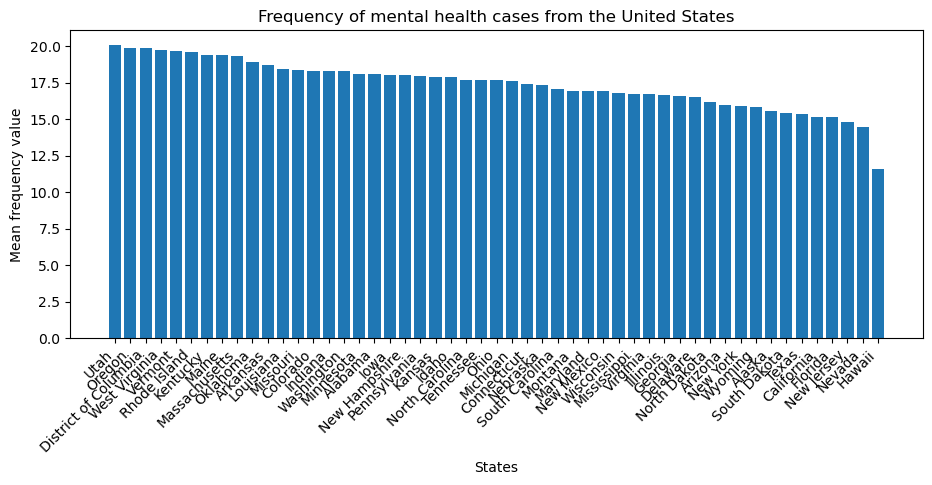

In [8]:
#remove the lines that contains the word United States
filter_states = US_df[US_df['State'] != 'United States']

#Group all the data by state and calculate the mena of the 'Value' column
filtered_df = filter_states.groupby('State')['Value'].mean().reset_index(name='mean_Value')

#sort the data descending
filtered_df = filtered_df.sort_values(by='mean_Value', ascending=False)

#Plot a bar graph using Matplotlib
plt.figure(figsize=(11,4))
plt.bar(filtered_df['State'], filtered_df['mean_Value'])
plt.title('Frequency of mental health cases from the United States')
plt.xlabel('States')
plt.ylabel('Mean frequency value')
plt.xticks(rotation=45, ha='right')
plt.show()

# Observation

The bar chart representation above is displayed as States as the X-axis and the mean frequency as the Y-axis. This bar chart helps me to understand at which state has the highest number of mental health cases.

From the above representation, Utah has the highest number of mental health cases.

How I came to this analysis? I first analysed the state column filtered out the United states.Then I grouped the data by state and used the average of the data from the value column. The value column has the numerical analysis for the data and referenced it by state.

Assuming that the value column defines the mean quantity of people from that state and subgroup who took the survey. The bar chart representation displays the mean of value column and calculates the highest mean quantity by state.

# Next steps

However even after finding out that Utah has the highest number of mental health cases. I would like to do a further exploration on the statistics on the Utah population. Thus I will do webscrapping to take some information from a website that will help me to solidify my findings.

In [9]:
#initialise the website
url = 'https://www.abc4.com/news/utah-has-the-highest-rate-of-mental-health-illness-in-the-u-s/'
response = requests.get(url)

#checks if the website can be launched
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    #set the text to search
    textSearch = 'A new study looking at the state of mental health throughout the U.S. found that those living in Utah, unfortunately, experience the highest level of mental illness in the nation.'
    
    #set the tag
    p_tag = soup.find('p', text = textSearch)
    
    #checks if the text that is searched for exists
    if p_tag:
        print(f'Found <p> element with text "{textSearch}": ')
        print(p_tag)
    else:
        print(f'No <p> element found with text "{textSearch}"')

else:
    print(f'Failed to download web page: {response.status_code}')


Found <p> element with text "A new study looking at the state of mental health throughout the U.S. found that those living in Utah, unfortunately, experience the highest level of mental illness in the nation.": 
<p>A new study looking at the state of mental health throughout the U.S. found that those living in Utah, unfortunately, experience the highest level of mental illness in the nation.</p>


C:\Users\user\AppData\Local\Temp\ipykernel_7616\2902001611.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  p_tag = soup.find('p', text = textSearch)


# Next steps

The above method may not be the most effective way to see the quantity of responses by state. Considering other columns will confirm this analysis.

An analysis is done on the state column. By grouping the data by state and calculating the mean LowCI value of each of those states

LowCI is also know as the Low Confidence Interval. Low confidence interval describes the population quantity that analyzed is larger. Which reflects a low confidence interval, thus results in a higher accuracy for the analysis.

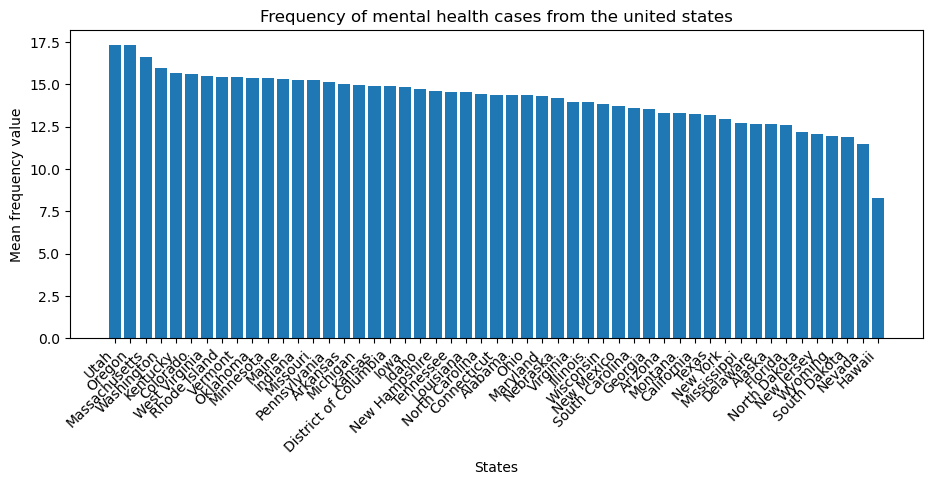

In [10]:
filter_states = US_df[US_df['State'] != 'United States']

#Group the data bt state and calculate the mean of the 'LowCI' column
filtered_df = filter_states.groupby('State')['LowCI'].mean().reset_index(name ='mean_LowCI')

filtered_df = filtered_df.sort_values(by='mean_LowCI', ascending=False)

#plot the bar graph
plt.figure(figsize=(11,4))
plt.bar(filtered_df['State'], filtered_df['mean_LowCI'])
plt.title('Frequency of mental health cases from the united states')
plt.xlabel('States')
plt.ylabel('Mean frequency value')
plt.xticks(rotation=45, ha='right')
plt.show()

# Deeper analysis

In [11]:
Subgroup_results = US_df.groupby('State')['Subgroup'].value_counts().reset_index(name='count')
Subgroup_results

,State,Subgroup,count
0,Alabama,Alabama,132
1,Alaska,Alaska,132
2,Arizona,Arizona,132
3,Arkansas,Arkansas,132
4,California,California,132
...,...,...,...
75,Virginia,Virginia,132
76,Washington,Washington,132
77,West Virginia,West Virginia,132
78,Wisconsin,Wisconsin,132


# Observation

From my observation, the dataset grouped by the state and subgroup. I can understand that the survey analysis was done on the overall population from the United States. 

This analysis is based on the overall population of the United States. It analyses multiple subgroups such as age, race, gender are some examples. Analysing these subgroups will aid in helping me to increase my understanding of this analysis.

Based on this observation, for this analysis I will referencing United States as the state to analyse the subgroup column from the dataset.

# Next steps

With reference to my observation from the analysis I will be analysing the subgroups from the United States.

For my analysis, I will first list out all the quantity for each of the subgroups.

In [12]:
select_US = US_df[US_df['State'] == 'United States']

filtered_results = select_US.groupby('State')['Subgroup'].value_counts().reset_index(name = 'count')
filtered_results

,State,Subgroup,count
0,United States,18 - 29 years,152
1,United States,"Non-Hispanic, other races and multiple races",152
2,United States,"Non-Hispanic Black, single race",152
3,United States,"Non-Hispanic Asian, single race",152
4,United States,Male,152
5,United States,Less than a high school diploma,152
6,United States,Hispanic or Latino,152
7,United States,High school diploma or GED,152
8,United States,30 - 39 years,152
9,United States,Female,152


# Observation

The dataset above displays all the subgroups that come from the United States from the state column from the dataset.

For my analysis, I would like to look deeper in the age groups from the subgroup column of the dataset. This will give me a better idea of which age group has the highest number of mental health cases.

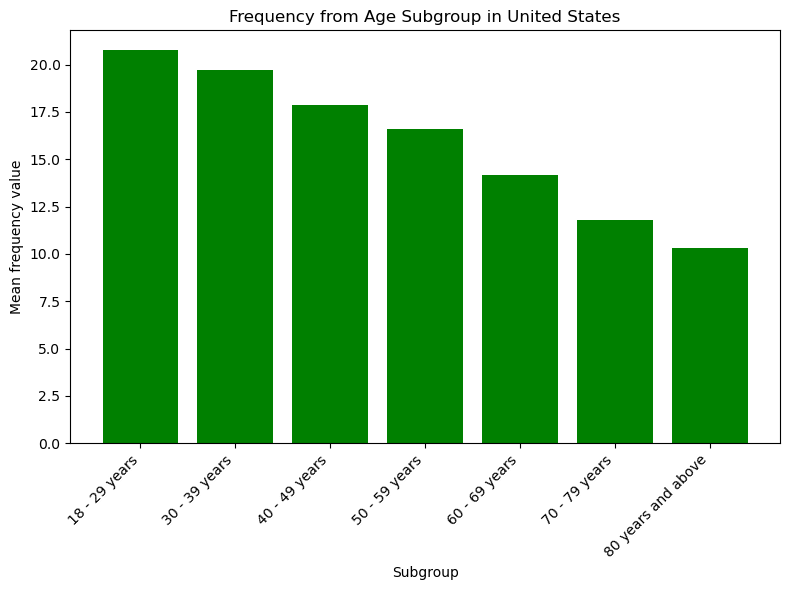

In [13]:
filtered_df = US_df[US_df['Subgroup'].str.contains('years') & (US_df['State'] == "United States")]

final_results = filtered_df.groupby(['State', 'Group', 'Subgroup'])['Value'].mean().reset_index()

#display the graph
plt.figure(figsize=(8,6))
plt.bar(final_results['Subgroup'], final_results['Value'], color='green')
plt.xlabel('Subgroup')
plt.ylabel('Mean frequency value')
plt.title('Frequency from Age Subgroup in United States')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
filtered_df = US_df[US_df['Subgroup'].str.contains('years') & (US_df['State'] == 'United States')]

final_results = filtered_df.groupby(['State', 'Group', 'Subgroup'])['Value'].mean().reset_index()

final_results

,State,Group,Subgroup,Value
0,United States,By Age,18 - 29 years,20.774242
1,United States,By Age,30 - 39 years,19.698485
2,United States,By Age,40 - 49 years,17.843182
3,United States,By Age,50 - 59 years,16.612121
4,United States,By Age,60 - 69 years,14.155303
5,United States,By Age,70 - 79 years,11.773485
6,United States,By Age,80 years and above,10.308403


# Next steps

To reinforce the analysis, considering the low confidence interval of age group can help to confirm that the 18 to 29 years age group has the highest frequency.

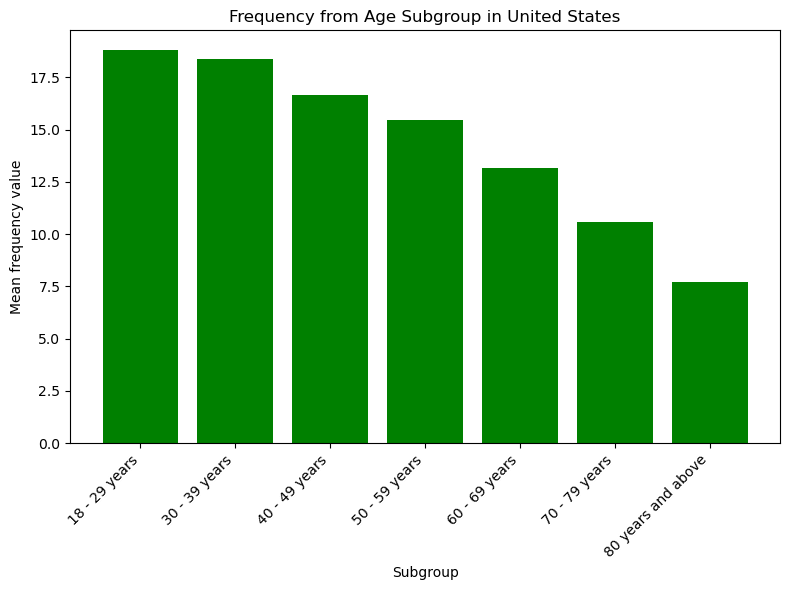

In [15]:
filtered_df = US_df[US_df['Subgroup'].str.contains('years') & (US_df['State'] == 'United States')]

final_results = filtered_df.groupby(['State','Group','Subgroup'])['LowCI'].mean().reset_index()

#display bar graph
plt.figure(figsize=(8,6))
plt.bar(final_results['Subgroup'], final_results['LowCI'], color='green')
plt.xlabel('Subgroup')
plt.ylabel('Mean frequency value')
plt.title('Frequency from Age Subgroup in United States')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Breakdown of the LowCI values based on the Age group

In [16]:
filtered_df = US_df[US_df['Subgroup'].str.contains('years') * (US_df['State'] == 'United States')]

final_results = filtered_df.groupby(['State', 'Group', 'Subgroup'])['LowCI'].mean().reset_index()

final_results

,State,Group,Subgroup,LowCI
0,United States,By Age,18 - 29 years,18.804545
1,United States,By Age,30 - 39 years,18.378788
2,United States,By Age,40 - 49 years,16.661364
3,United States,By Age,50 - 59 years,15.471970
4,United States,By Age,60 - 69 years,13.180303
5,United States,By Age,70 - 79 years,10.554545
6,United States,By Age,80 years and above,7.707563


# Observation

From this analysis, the highest number mental health cases are from the 18 to 29 years age group. Despite having this analysis done, I found that there are gaps in the research that was done on the people from the United States. This study was done as an internet survey, which means that this only describes only a handful of people from the United States that have responded to the survey. There are many factors that may contribute to mental health cases, some examples are family history or other factors can be lifestyle of the individuals. If the individual is surrounded by a negative circle of friends or family, it will directly affect the individual which increases the chances of mental health conditions.

# Missing steps in analysis

For the purposes of this analysis, I did not consider using the interquartile range and compare the difference between the first quartile, middle quartile, and the third quartile. Refering to this study done, it does not provide sufficient information for me to do a detailed analysis on the interquartile range based on the population. Definitely if there was more data provided from this study it will produce a more accurate and detailed analysis on mental health cases from the United States.

# Opening Survey dataset

In [17]:
#set the path of the data set
survey_datafile_path = 'survey.csv'

if os.path.exists(survey_datafile_path):
    survey_df = pd.read_csv(survey_datafile_path)
    print("The file exists you can proceed with the analysis.")
else:
    print(f"The file '{survey_datafile_path}' does not exists.")

The file exists you can proceed with the analysis.


# Why this particular dataset

For this analysis, I have selected this particular dataset for the purpose of exploring the views and background of the residents of the United States. This dataset strength is that it provides an in depth spread of data that contributes to this purpose of exploration. It contains survey data which enables the residents to respond in an honest and personal level.

However, the responses from the survey contains some values such as "don't know". These kind of values does not contribute to my understanding from the analysis and does not provide me with substantial argument to claim that the particular responses feel a certain why about the question posed.

# Observation

The above validation is used to confirm that the dataset exists in the environment. If the validation finds that the path is accurate then it will print out the dataset. But if the validation finds that the path is wrong then it will return a error message describing that the file path is not found.

# Cleaning Survey dataset

From my observation, I found that some of the data in the dataset either have the same meaning or some of the data might not be useful for the data analysis.

This is is the result of the dataset before cleaning up the data for analysis.

In [18]:
select_US = survey_df[survey_df['Country'] == 'United States']

filtered_results = select_US.groupby('Country')['Gender'].value_counts().reset_index(name = 'count')

filtered_results

,Country,Gender,count
0,United States,Male,348
1,United States,M,92
2,United States,male,90
3,United States,Female,82
4,United States,female,43
5,United States,F,34
6,United States,m,18
7,United States,f,11
8,United States,Make,4
9,United States,Woman,2


# Observation

As you can see from the data, the data is messy and disorganised. 

To make the dataset easier to work with, mapping the data into a dictionary can be used. This increases the accuracy of the analysis.

In [19]:
# Display unique values in the 'gender' column
survey_df['Gender'].unique()

# Create a dictionary to map similar meanings to a common category
gender_mapping = {
    'Male': 'Male',
    'Man': 'Male',
    'm': 'Male',
    'cis male': 'Male',
    'M': 'Male',
    'Male (CIS)': 'Male',
    'Male': 'Male',
    'Cis Male': 'Male',
    'm': 'Male',
    'male': 'Male',

    'Trans-female': 'Female',
    'Trans woman': 'Female',
    'Female (cis)': 'Female',
    'cis-female/femme': 'Female',
    'Cis Female': 'Female',
    'Female (trans)': 'Female',
    'Female': 'Female',
    'Woman': 'Female',
    'f': 'Female',
    'F': 'Female',
    'female': 'Female',
    'woman': 'Female',

    'queer/she/they': 'Others',
    'msle': 'Others',
    'Nah': 'Others',
    'Male-ish': 'Others',
    'Mail': 'Others',
    'Genderqueer': 'Others',
    'Femake': 'Others',
    'p': 'Others',
    'non-binary': 'Others',
    'maile': 'Others',
    'femail': 'Others',
    'Make': 'Others',
    # Add more mappings as needed
}

# Apply the mapping to the 'gender' column
survey_df['Gender'] = survey_df['Gender'].map(gender_mapping)
survey_df.to_csv('cleaned_file.csv', index=False)

# Updated Survey dataset

In [20]:
#read the updated data set
Updatedsurvey_datafile_path = 'cleaned_file.csv'

if os.path.exists(Updatedsurvey_datafile_path):
    newData_df = pd.read_csv(Updatedsurvey_datafile_path)
    print("This is the updated file, it exists and you can proceed with the analysis.")
else:
    print(f"The file '{Updatedsurvey_datafile_path} does not exist.'")

This is the updated file, it exists and you can proceed with the analysis.


# Observation

The above validation is used to confirm that the dataset exists in the environment. If the validation finds that the path is accurate then it will print out the dataset. But if the validation finds that the path is wrong then it will return a error message describing that the file path is not found.

# Observation

After analysing the dataset further, I found that there are negative values in the age column.

In [21]:
select_US = newData_df[newData_df['Country'] == 'United States']

filtered_results = select_US.groupby('Country')['Age'].value_counts().reset_index(name='count')

filtered_results

,Country,Age,count
0,United States,29,50
1,United States,33,46
2,United States,32,44
3,United States,35,41
4,United States,31,41
5,United States,25,39
6,United States,30,37
7,United States,26,37
8,United States,28,34
9,United States,27,34


From the above dataframe I can see that the data has some negative values and some values that does not make sense for our analysis.

To elaborate further in the dataframe I can observe that one of the age that does not make sense for the analysis would be the age 329 years old and there are negative values.

# Next steps

For this analysis, I will be updating the age column to only store the age data values from the range of 0 to 100.

In [22]:
updatedAge_df = newData_df[(newData_df['Age'] >= 0) & (newData_df['Age'] <= 100)]

updatedAge_df.to_csv('cleaned_file.csv', index=False)

#read the csv data set
cleanedSurvey_df = pd.read_csv('cleaned_file.csv')

cleanedSurvey_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1250,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1251,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1252,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Updated dataset

In [23]:
select_US = cleanedSurvey_df[cleanedSurvey_df['Country'] == 'United States']

filtered_results = select_US.groupby('Country')['Age'].value_counts().reset_index(name='count')

filtered_results

,Country,Age,count
0,United States,29,50
1,United States,33,46
2,United States,32,44
3,United States,35,41
4,United States,31,41
5,United States,25,39
6,United States,26,37
7,United States,30,37
8,United States,27,34
9,United States,28,34


# Next steps

To increase my understanding of the country I am working with, I will be analysing the frequency of the responses from which country.

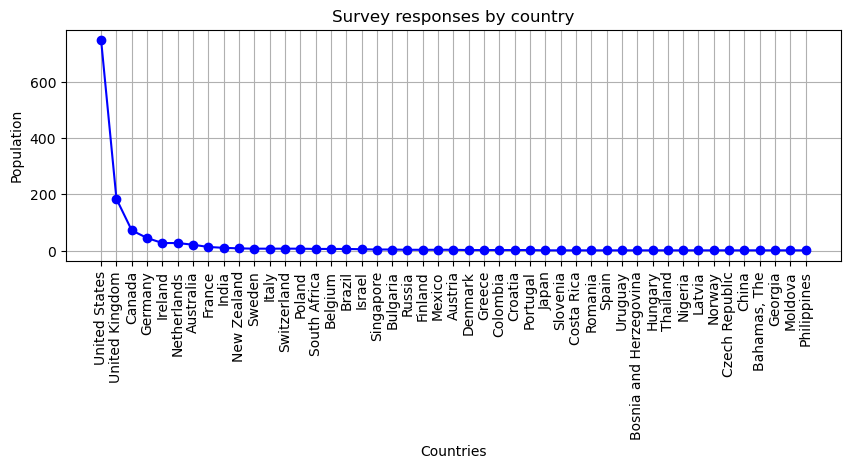

In [24]:
frequencyByCountry = cleanedSurvey_df['Country'].value_counts().reset_index(name = 'count')

#sort the data by count for a more meaningful line plot
frequencyByCountry = frequencyByCountry.sort_values(by='count', ascending=False)

#create a line plot
plt.figure(figsize=(10,3))
plt.plot(frequencyByCountry['Country'], frequencyByCountry['count'], marker='o', linestyle='-', color='blue')

#customise the plot
plt.title('Survey responses by country')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Observation

From this line graph analysis I can oberserve that most of the survey responses came from the United States.

So, based on this deduction I will then survey those people from the United States and display their responses below to get a better understanding on their views and their background.

For this survey it was on a volunteer basis so the people would take the survey if they wanted to. The information of the people who took the survey are not disclosed to the public and only the responses are available.

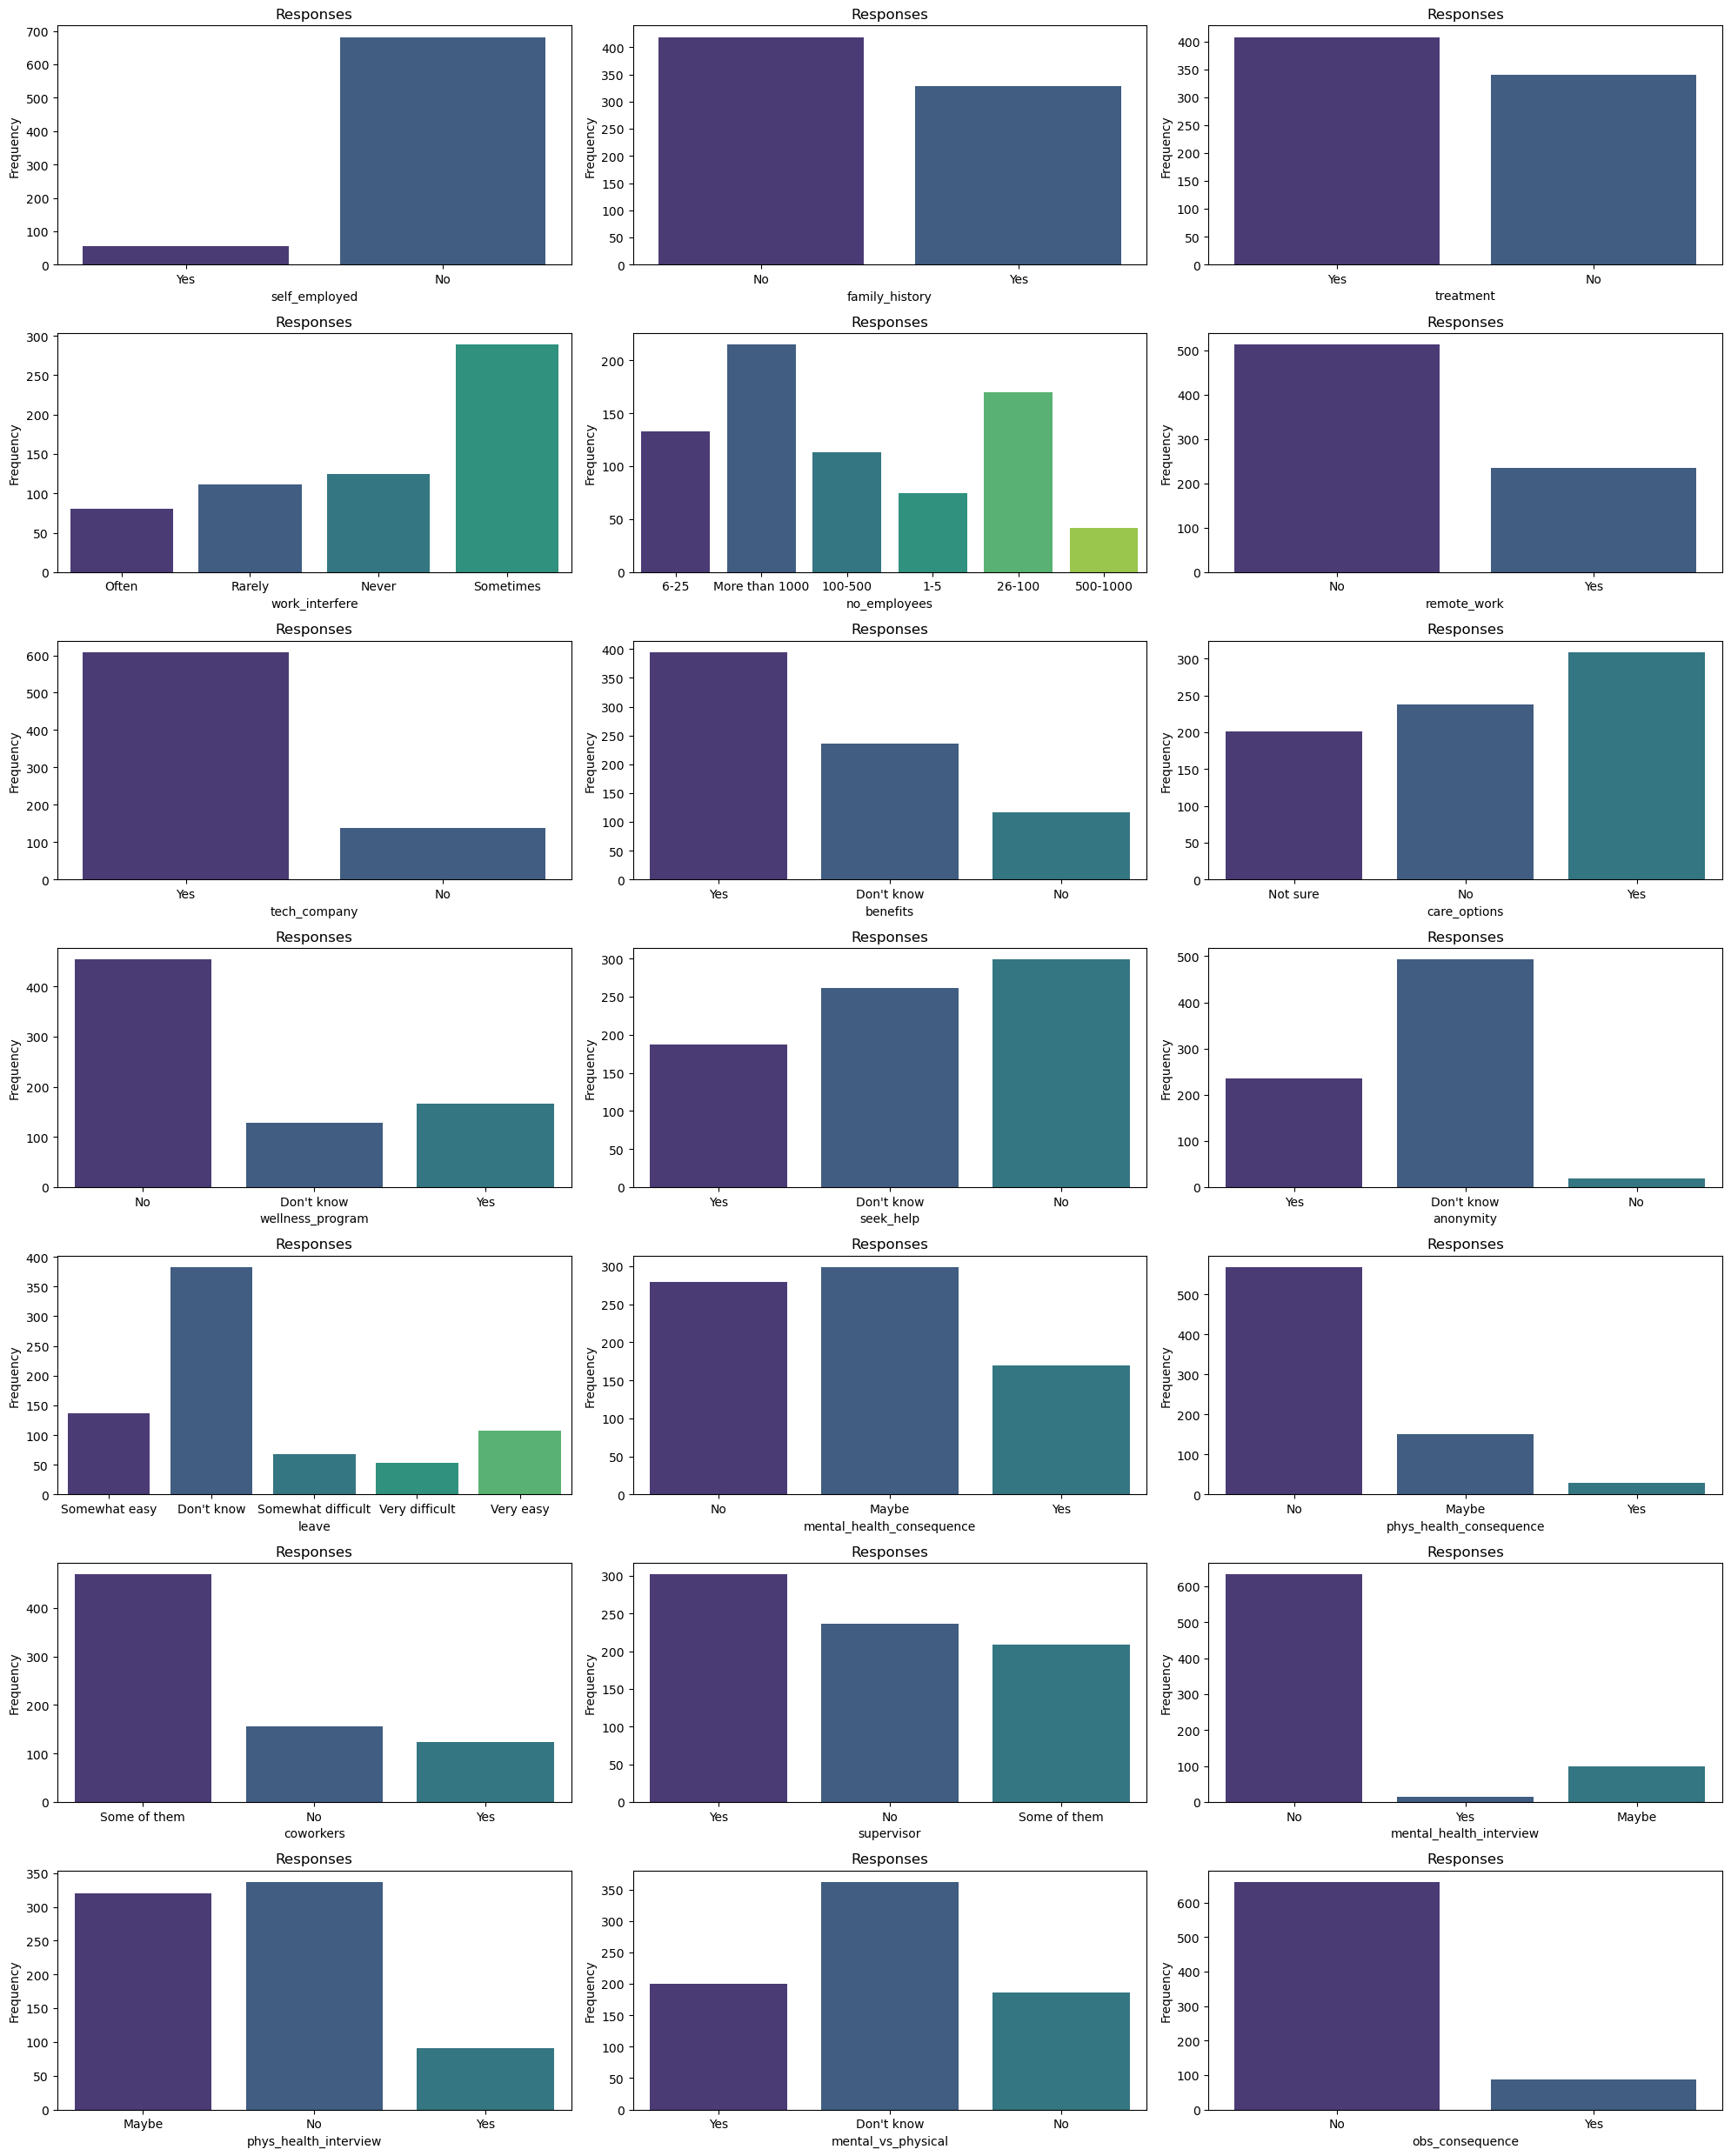

In [25]:
#filter the data for the united states
US_response = cleanedSurvey_df[cleanedSurvey_df['Country'] == 'United States']

#define the list of questions columns
question_columns = [
    "self_employed", "family_history", "treatment", "work_interfere", "no_employees",
    "remote_work", "tech_company", "benefits", "care_options", "wellness_program",
    "seek_help", "anonymity", "leave", "mental_health_consequence",
    "phys_health_consequence","coworkers","supervisor", "mental_health_interview", 
    "phys_health_interview", "mental_vs_physical", "obs_consequence"
]

#create a single composite bar graph
plt.figure(figsize=(20,28))
sns.set_palette('viridis')

for i, column in enumerate(question_columns):
    plt.subplot(len(question_columns)//3 + 1, 3, i+1)
    sns.countplot(data=US_response, x=column)
    plt.title(f'Responses')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

# Next steps:

Next I would like to analyse of those people from the United States what percentage of them are Male or Female.

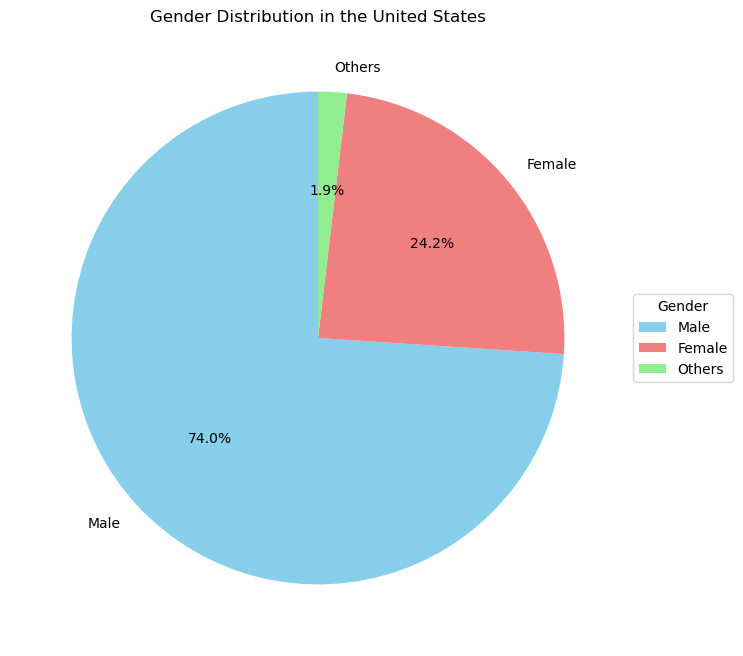

In [26]:
US_data = cleanedSurvey_df[cleanedSurvey_df['Country'] == "United States"]

Gender_data = US_data.groupby('Country')['Gender'].value_counts().reset_index(name='count')

gender_counts = Gender_data['Gender'].value_counts()

#create pie chart
plt.figure(figsize=(8,8))
plt.pie(Gender_data['count'],labels=Gender_data['Gender'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral','lightgreen'])
plt.legend(title='Gender', labels=gender_counts.index, loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Gender Distribution in the United States')
plt.show()

# Observation

From the pie chart analysis above, I understand that 74.0% of Males, 24.2% of Females and 1.9% of Others are suffering from mental health issues.

# Next steps

Next I would like to analyse the age frequency of the dataset to reinforce my study on the age group that has the most number of mental health cases.

In [27]:
US_data = cleanedSurvey_df[cleanedSurvey_df['Country'] == 'United States']

Age_data = US_data.groupby('Country')['Age'].value_counts().reset_index(name = 'count')

Age_data

,Country,Age,count
0,United States,29,50
1,United States,33,46
2,United States,32,44
3,United States,35,41
4,United States,31,41
5,United States,25,39
6,United States,26,37
7,United States,30,37
8,United States,27,34
9,United States,28,34


# Opening student mental health csv file

In [28]:
#open the csv file
student_datafile_path = 'studentMentalHealth.csv'

#checks if the path exists
if os.path.exists(student_datafile_path):
    student_health_df = pd.read_csv(student_datafile_path)
    print("The file exists you may proceed with the analysis.")
else:
    print(f"The file '{student_datafile_path}' does not exist.")

The file exists you may proceed with the analysis.


# Observation

The above validation is used to confirm that the dataset exists in the environment. If the validation finds that the path is accurate then it will print out the dataset. But if the validation finds that the path is wrong then it will return a error message describing that the file path is not found.

After analysing the dataset deeper, I found that for the year of study column has values of the same meaning but are entered inaccuratly in the dataset.

To fix this issue, I will consider mapping the data values into a library. This will increase the accuracy of the analysis and will produce a better output of the data.

# Mapping to a dictionary

In [29]:
# Display unique values in the 'gender' column
student_health_df['Your current year of Study'].unique()

# Create a dictionary to map similar meanings to a common category
yearOfStudy_mapping = {
    'year 1': 'Year 1',
    
    'Year 1': 'Year 1',
    
    'year 2': 'Year 2',
    
    'Year 2': 'Year 2',
    
    'year 3': 'Year 3',
    
    'Year 3': 'Year 3',
    
    'year 4': 'Year 4',
}

# Apply the mapping to the 'Your current year of Study' column
student_health_df['Your current year of Study'] = student_health_df['Your current year of Study'].map(yearOfStudy_mapping)
student_health_df.to_csv('UpdatedStudentHealth.csv', index=False)
Updated_student_health_df = pd.read_csv('UpdatedStudentHealth.csv')

# Updated dataset

In [30]:
year_of_study = Updated_student_health_df.groupby(['Your current year of Study']).size().reset_index(name='Frequency')

year_of_study

,Your current year of Study,Frequency
0,Year 1,43
1,Year 2,26
2,Year 3,24
3,Year 4,8


# Next steps:

From my discovery, I found that most of the mental health cases came from the age group 18 to 29 years. So, I would assume that most of them are either working or studying during that age period in their life. Thus I decided to do a survey on students. For example, what courses are they studying and what is the course that causes the most cases in mental health conditions.

In [31]:
course_data = Updated_student_health_df.groupby(['What is your course?', 'Age']).size().reset_index(name='Frequency')

frequency_data = course_data.sort_values(by='Frequency', ascending=False)

top_data = frequency_data.head(10)

top_data

,What is your course?,Age,Frequency
2,BCS,18.0,7
29,Engineering,19.0,6
28,Engineering,18.0,5
6,BCS,24.0,5
11,BIT,24.0,4
9,BIT,19.0,4
32,Engineering,24.0,4
3,BCS,19.0,3
43,KOE,18.0,2
66,psychology,18.0,2


# Observation

From this analysis I can see that the most mental health cases comes from the Bachelor of Computer Science course.

# Next steps:

Based on this information I would like to find out what year are these students coming from and which year causes the most number of mental health cases.

In [32]:
course_df = Updated_student_health_df[Updated_student_health_df['What is your course?'] == 'BCS']

year_data = course_df.groupby(['What is your course?', 'Your current year of Study']).size().reset_index(name='Frequency')

sortedCourse_data = year_data.sort_values(by='Frequency', ascending=False)

top_data = sortedCourse_data.head(10)

top_data

,What is your course?,Your current year of Study,Frequency
0,BCS,Year 1,10
1,BCS,Year 2,4
2,BCS,Year 3,3
3,BCS,Year 4,1


# Next steps:

I would like to display the number of mental health cases by their course name into a bar graph for a better visualisation of the data.

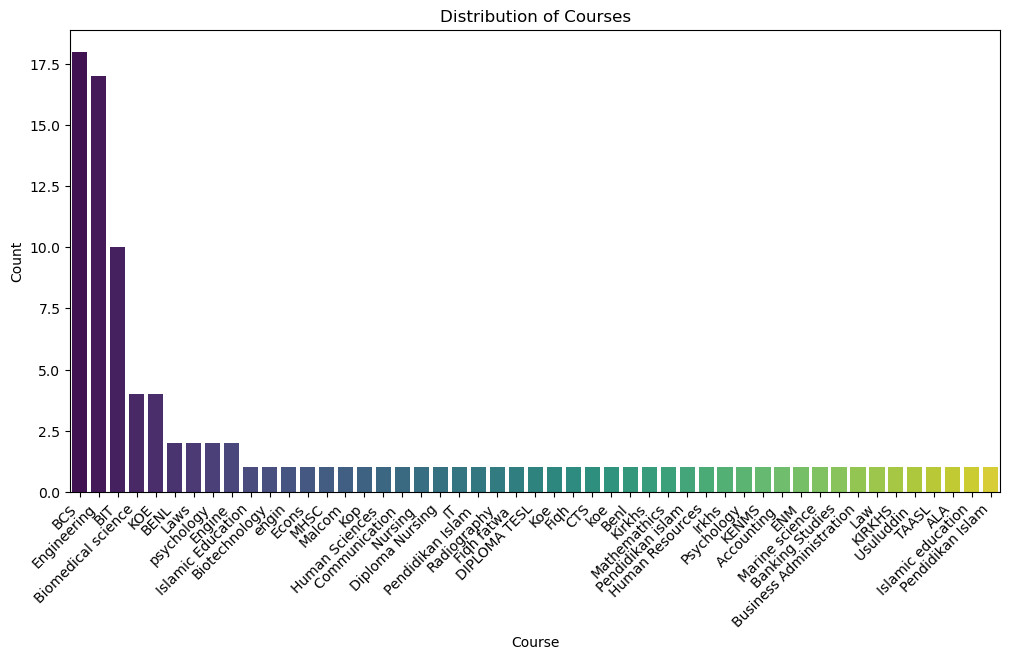

In [33]:
course_counts = Updated_student_health_df['What is your course?'].value_counts(ascending=False)

#plot the graph
plt.figure(figsize=(12,6))
sns.countplot(data=Updated_student_health_df, x='What is your course?', palette ='viridis', order=course_counts.index)
plt.title('Distribution of Courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Next steps:

So based on my discoveries so far I can see that most of the cases comes from the Bachelor of Computer Science course. So I decided to do a survey on those that currently studying that course and get their views and background of their mental health condition.

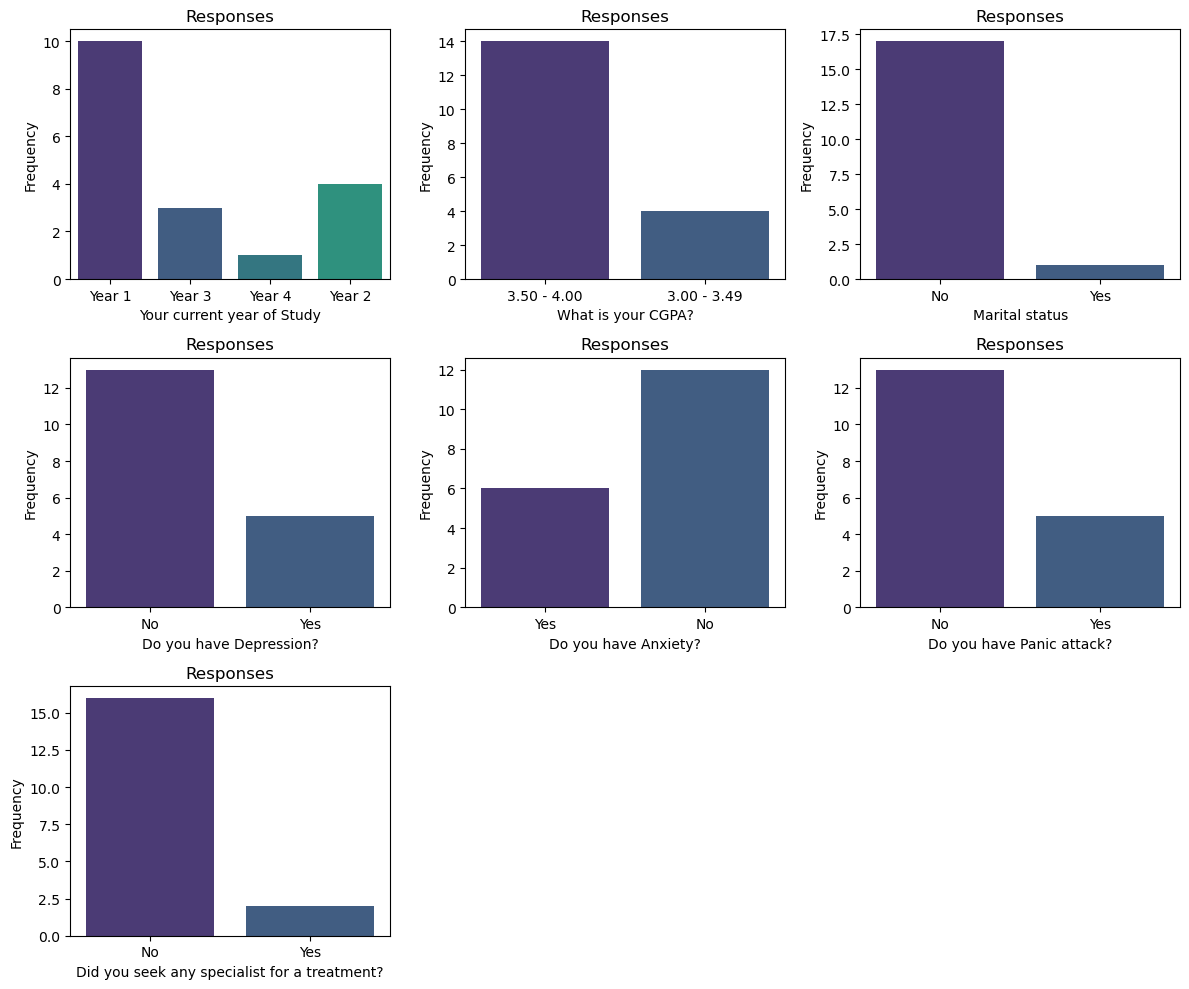

In [34]:
#Filter the data for the united states
course_data = Updated_student_health_df[Updated_student_health_df['What is your course?'] == 'BCS']

#Define the list of question columns
question_columns = [
    "Your current year of Study", "What is your CGPA?", "Marital status", "Do you have Depression?", "Do you have Anxiety?",
    "Do you have Panic attack?", "Did you seek any specialist for a treatment?"]

#create a graph
plt.figure(figsize=(12,10))
sns.set_palette('viridis')

for i, column in enumerate(question_columns):
    plt.subplot(len(question_columns)//3 + 1, 3, i+1)
    sns.countplot(data=course_data, x=column)
    plt.title(f'Responses')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

# Conclusion

Based on this analysis, most of the mental health disorder cases came from the United States. The 18 to 29 years age group from United States also had the highest numbe of cases. Undergoing a deeper analysis, students of 18 years that are pursuing a Bachelor in Computer Science degree. And under the Bachelor of Computer Science are in the first year of study. This can be likely because in their first year the students have a high learning curve to handle. As it is their first year of study so they have a lot of content to process, which might likely have caused the mental issues to arise.

However for this research, it was focused and limited to only a small amount of people from the United States within a specific age group and academic area. Some other considerations that I might not have considered, such as the cultural background or even the availabilty to access mental health resources to help the victims of mental health to have a better understanding of their situation and to potentially work their way to improve their mental health.

# References

Tikkanen, R., Fields, K., Williams, R. D., & Abrams, M. K. (May 21, 2020). Mental health conditions and substance use: Comparing U.S. needs and treatment capacity with those in other high-income countries. The Commonwealth Fund.
https://www.commonwealthfund.org/publications/issue-briefs/2020/may/mental-health-conditions-substance-use-comparing-us-other-countries

National Institute of Mental Health (NIMH). (n.d.). Suicide Statistics. Retrieved from https://www.nimh.nih.gov/health/statistics/suicide#:~:text=The%20total%20age%2Dadjusted%20suicide,13.5%20per%20100%2C000%20in%202020.

SAMHSA Substance Abuse and Mental Health Services Administration. Retrieved from:https://www.abc4.com/news/utah-has-the-highest-rate-of-mental-health-illness-in-the-u-s/